# 長期投資の基本

本記事では最も基本的なデータ分析の方法を学びます。

- 長期投資が基本
- 長期に手に入るデータで値動きの特徴を分析




- 市場規模の把握
- 見せかけのトレンドとランダムウォーク
- 破綻をさけるために


# 市場規模の把握

長期投資の基本は相手をよく知ること。それは他と比べることから始まる。投資をする際には正確にその市場規模を理解しておく。

![](2.png)
![](3.png)


大体の規模感がつかめたのではないでしょうか？少なくとも米国の金融市場は日本よりもバカでかい。

- 
- 
- 
- 
- 
- 


# 見せかけのトレンドとランダムウォーク

多くの経済時系列や株価はランダムウォークにしたがいます。ランダムウォークにしたがう時系列は時間の経過にともない平均や分散が変化してしまいます。ランダムウォークでは時間の経過とともに平均は確率的に変化し、分散は時間の経過の平方根に比例して増大します。したがって、その株価の将来は予測が不可能です。予測ができないということは売買するタイミングを図っても意味がありません。ランダムウォークが酔っ払いの千鳥足にたとえられる通り将来どこに行くの分からないのです。かつ時間の経過とともにその幅を大きくなります。つまり、大きく上昇するかもしれませんが、下落もします。

株価データがランダムウォークにしたがうかどうかを知ることはつぎの2つの点から重要です。
1) 発生したトレンドが見せかけのトレンドか、トレンドはたまたま生じたものなのか、
2) ２つの時系列が相関を示したときにそれらは見せかけの相関か、たまたま発生したものではないのか、
という点です。

Pythonでランダムウォークをつくってみましょう。つぎに図は乱数が作った下落の動きです。ほぼ一方方向に下落しています。


In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas_datareader.data as web #データのダウンロードライブラリ
import numpy as np
import pandas as pd

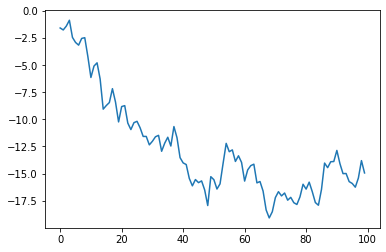

In [2]:
def generate(y0,rho,sigma,nsample):
    e = np.random.normal(size=nsample)
    y=[]
    y.append(rho*y0+e[0])
    for i,u in enumerate(e[1:]):
        y.append(rho*y[i]+u)
    plt.plot(y)
generate(1,1,1,100)    

つぎに実際の株価を見てみましょう。株価がランダムウォークであるかどうかを判定する方法としてディッキーフラー検定があります。この検定には

- ドリフト無しランダムウォーク(rw)
- ドリフト付きランダムウォーク(drw)
- 時間トレンド・ドリフト付きランダムショーク(tdrw)
- 加速度付き時間トレンド・ドリフト付きランダムウォーク(qtdrw)

があります。これらの結果が0.1以下であれば、ランダムウォークでない可能性が高まります。

実際に、最小分散ポートフォリオ(usmv),ナスダック１００(qqq),S&P500(spy),ダウ平均(dia)についてみてみましょう。

usmv (0.9278076581393794, 23) (0.7920784509497161, 23) (0.03363373582118599, 23) (0.09738332169989067, 23)
qqq (0.9861659702677448, 9) (0.9582383115101213, 9) (0.0954963375703542, 9) (0.06856811893062406, 9)
spy (0.8416559172953404, 9) (0.7725639039166292, 9) (0.0028893425599770995, 9) (0.012438989181217764, 9)
dia (0.7604221645070511, 9) (0.6727911212628608, 9) (0.06819200251943222, 9) (0.07322737478805774, 9)


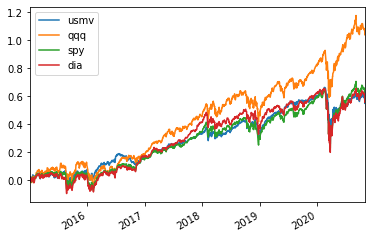

In [3]:
from statsmodels.tsa.stattools import adfuller

BASIC=['usmv','qqq','spy','dia']

ror = web.DataReader("DGS1","fred","1980/1/4")#米国連邦準備委員会のホームページから米国金利をダウンロード
#ror.plot()
ror = ror/250/100#jpy

def LongtermInvest(PORT,ror,start):
    i=1
    for asset in PORT:
        tsd = web.DataReader(asset,"yahoo",start).dropna()#jpy
        dtsd=tsd.pct_change()
        tmp=pd.concat([dtsd.loc[:,'Adj Close'],ror],axis=1).dropna()
        tmp['adj']=(1+tmp.iloc[:,0]/(1+tmp.iloc[:,1]))
        tsda=tmp.iloc[:,2].cumprod()
        ts=np.log(tsda.dropna())
        ts.plot(label=str(asset))
        print(asset,adfuller((ts),regression='nc')[1:3],
            adfuller((ts),regression='c')[1:3],
            adfuller((ts),regression='ct')[1:3],
            adfuller((ts),regression='ctt')[1:3])
        if i==5:
            plt.legend()
            plt.show()
            i=0
        i+=1
    if i!=1:
        plt.legend()
        plt.show()        
i=1
LongtermInvest(BASIC,ror,'2015/1/4')

結果は順に、ドリフト無しランダムウォーク、ドリフト付きランダムウォーク、時間トレンド・ドリフト付きランダムショーク、加速度付き時間トレンド・ドリフト付きランダムウォークです。すべての場合において時間トレンド(tdrw,qtdrw)がある可能性を結果は示唆しています。

# 破綻を避けるために

4つの基本株式売買戦略のうち破綻する確率が低いのはどれですか？

- リバランス：価格が動いたことにより、投資比率が目標値からずれたら元に戻す戦略。
- 損切：損が出たら、ポジションを閉じる。
- オプション：保険のようにプレミアムを払ってリスクを回避。
- 買い持ち(バイアンドホルド)：買いポジションを保有し続ける。

この中で破綻する確率が低い戦略はリバランスと買い持ちだけです。

- オプションはオプション料に見合う収益が得られなれば破綻する。
- 損切は、その損が収益よりも大きければ破綻する。

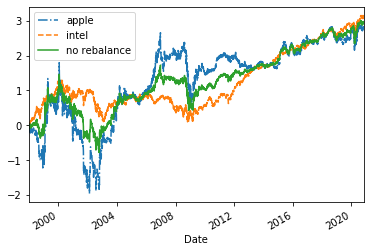

In [4]:
aapl=web.DataReader("INTL", "yahoo","1997/12/31","2020/12/31")['Adj Close']
intc=web.DataReader("HD", "yahoo","1997/12/31","2020/12/31")['Adj Close']

aapl=aapl/aapl.iloc[0]#株価の指数化
lnaapl=np.log(aapl)
dlnaapl=lnaapl.diff().dropna()
intc=intc/intc.iloc[0]
intc
lnintc=np.log(intc)
dlnintc=lnintc.diff().dropna()
lnaapl.plot(label='apple',style='-.')
lnintc.plot(label='intel',linestyle='--')
lnport=0.5*lnaapl+0.5*lnintc
lnport.plot(label='no rebalance')
plt.legend(loc='upper left')

In [5]:
def portfolio_rebalance(tsd1,tsd2):
    port=pd.concat([tsd1,tsd2],axis=1).dropna()
    port.columns=('p1','p2')
    port['a1']=0
    port['a2']=0
    port['v']=1
    n=len(port)
    p1=port['p1'].iloc[0]
    p2=port['p2'].iloc[0]
    v=port['v'].iloc[0]
    a1=float(v/2/p1)
    a2=float(v/2/p2)
    port.iloc[0,2]=a1
    port.iloc[0,3]=a2
    for i in range(1,len(port)):
        p1=port['p1'].iloc[i]#今日のアップルの株価
        p2=port['p2'].iloc[i]#今日のインテルの株価
        p1_0=port['p1'].iloc[i-1]#前日のアップルの株価
        p2_0=port['p2'].iloc[i-1]#前日のインテルの株価
        a1_0=port['a1'].iloc[i-1]#前日のアップルの保有株数
        a2_0=port['a2'].iloc[i-1]#前日のインテルの保有枚数
        v_0=port['v'].iloc[i-1]#前日のリバランスポートフォリオの価値
        #v=a1_0*(p1-p1_0)+a2_0*(p2-p2_0)+v_0#今日のリバランスポートフォリオの価値
        v=a1_0*p1+a2_0*p2#今日のリバランスポートフォリオの価値
        port.iloc[i,4]=v#リバランスポートフォリオの価値のアップデート
        a1=float(v/2/p1)#調整後のアップルの株数
        a2=float(v/2/p2)#調整後のインテルの株数
        port.iloc[i,2]=a1#アップルの株数のアップデート
        port.iloc[i,3]=a2#インテルの株数のアップデート
    port['v2']=0.5*port.p1+0.5*port.p2#リバランスの無いポートフォリオの価値
    return port
port=portfolio_rebalance(aapl,intc)

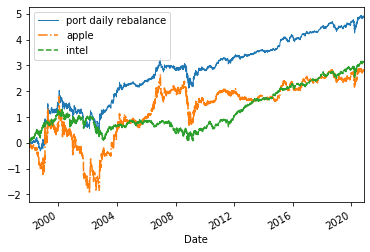

In [6]:
lnport=np.log(port)
lnport.v.plot(label="port daily rebalance",linewidth=1.0)
lnaapl.plot(label='apple',style='-.')
lnintc.plot(label='intel',linestyle='--')
plt.legend(loc="upper left")

# 本記事そして本記事以外の分析の結果

- 株を購入したら利益が出るまで売らない。
- 損切はしない。
- 利益が出たらいつでも売っていいが、長く持った方が利益率は上がる。

初心者は
- 分散投資された株価指数への投資を基本とする。